In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Constructing the Data

In [2]:
# Set-Up
# N_t: number of times data is detected; N_p: number of pixels
# signal: data of signal (which in this case is modeled to be a sine function in each pixel)
# P: pointing matrix

N_t, N_p = 150 * 50, 25

signal = [[0] for _ in range(N_p)]
for i in range(N_p):
    signal[i][0] = 5 * i * math.sin((2 * math.pi / 25) * i)
signal = np.array(signal)

P = [[0] * N_p for _ in range(N_t)]
for row in range(N_t):
    for col in range(N_p):
        P[row][col] = 1 if ((row / 150) // 2 == col) else 0
P = np.array(P)

(25, 1)


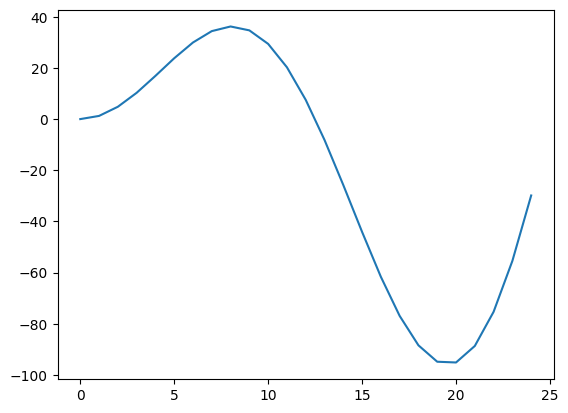

In [3]:
# check signal

print(np.shape(signal))
plt.plot(signal)

(array([0]),)
(array([0]),)
(array([1]),)
(array([1]),)
(array([24]),)


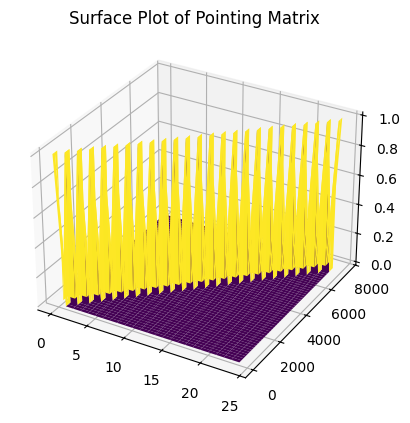

In [4]:
# check P

print(np.where(P[0] == 1))
print(np.where(P[150] == 1))
print(np.where(P[300] == 1))
print(np.where(P[301] == 1))
print(np.where(P[50 * 150 - 1] == 1))

from mpl_toolkits.mplot3d import Axes3D

x = np.arange(P.shape[1])
y = np.arange(P.shape[0])
x, y = np.meshgrid(x, y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, P, cmap='viridis')
ax.set_title("Surface Plot of Pointing Matrix")
plt.show()

In [5]:
Data = np.dot(P, signal)
print(np.shape(Data))

(7500, 1)


Plots of Data

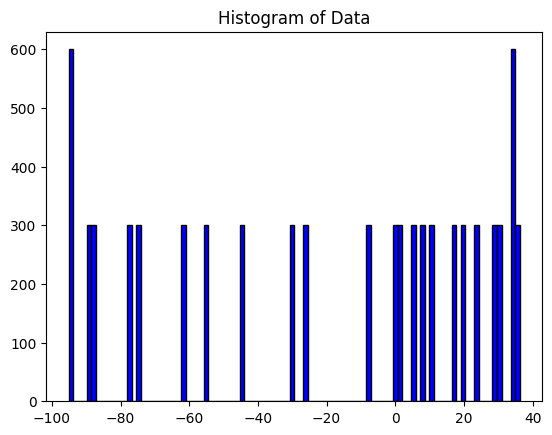

In [6]:
# Histogram after flattening

Data_flat = Data.flatten()

plt.hist(Data, bins=100, color='blue', edgecolor='black')
plt.title("Histogram of Data")
plt.show()

In [ ]:
# # Surface Plot

# from mpl_toolkits.mplot3d import Axes3D

# x = np.arange(Data.shape[1])
# y = np.arange(Data.shape[0])
# x, y = np.meshgrid(x, y)

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(x, y, Data, cmap='viridis')
# ax.set_title("Surface Plot of Data")
# plt.show()

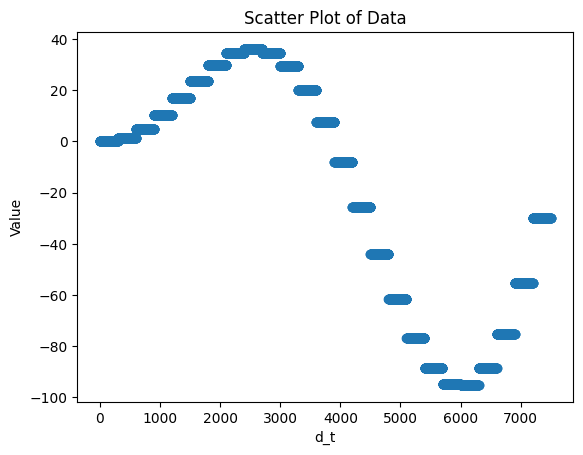

In [7]:
# Scatter Plot

plt.scatter(range(len(Data_flat)), Data_flat)
plt.xlabel("d_t")
plt.ylabel("Value")
plt.title("Scatter Plot of Data")
plt.show()

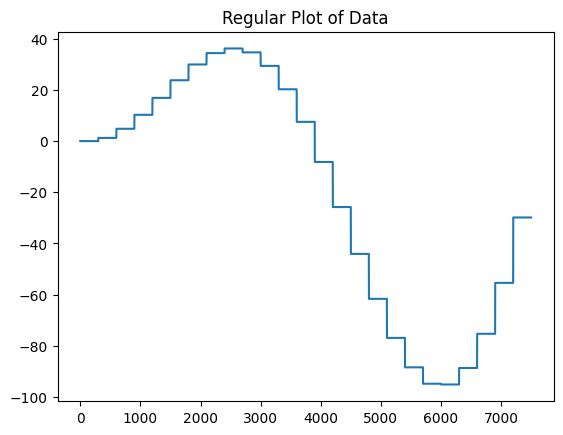

In [8]:
plt.title("Regular Plot of Data")
plt.plot(Data.flatten())

In [110]:
# # Contour

# plt.contour(Data)
# plt.title("Contour Plot of Data")
# plt.colorbar() 
# plt.show()

Add White, Gaussian Noise to Data Stream

In [9]:
# Creating noise array

N = N_t
noise = np.random.randn(N) * 10
noise = noise.reshape(-1,1)

# Check the mean and variance
print(np.shape(noise))
print("Mean:", np.mean(noise))
print("Variance:", np.var(noise))

(7500, 1)
Mean: -0.0838813046229808
Variance: 97.52174069383318


In [10]:
Data_final = np.add(Data, noise)

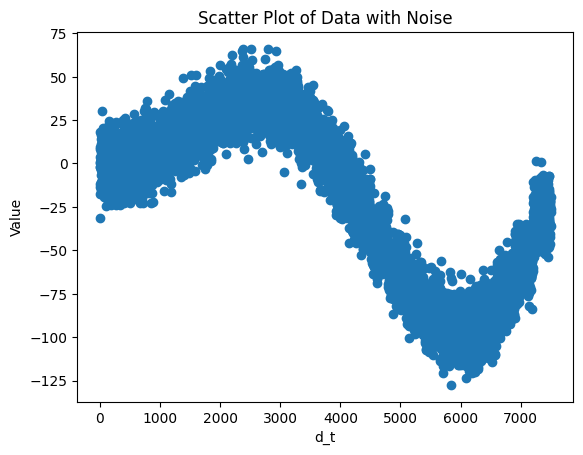

In [11]:
# Scatter Plot

plt.scatter(range(len(Data_final.flatten())), Data_final.flatten())
plt.xlabel("d_t")
plt.ylabel("Value")
plt.title("Scatter Plot of Data with Noise")
plt.show()

Text(0.5, 1.0, 'Regular Plot of Data with Noise')

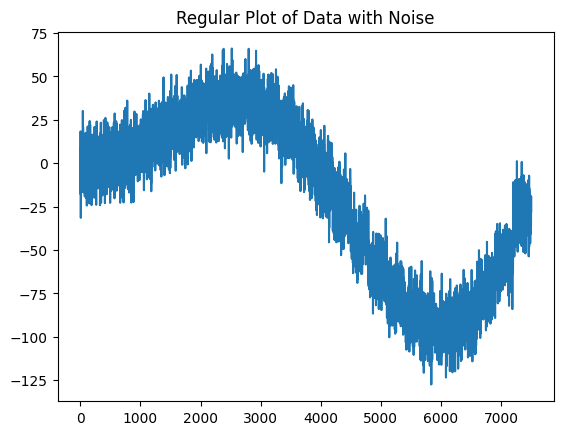

In [12]:
plt.plot(Data_final.flatten())
plt.title("Regular Plot of Data with Noise")

Extracting Signal from the Data when Covariance is I

In [17]:
# Covariance matrix set to N_t-th identity matrix

cov_matrix = np.var(noise) * np.eye(N_t)

In [18]:
cov_inv = (1 / np.var(noise)) * np.eye(N_t)
intermediate = P.T @ cov_inv

In [19]:
signal_est = np.dot(np.linalg.inv(np.dot(intermediate, P)), np.dot(intermediate, Data_final)) # Covariance matrix ignored because it is an identity matrix

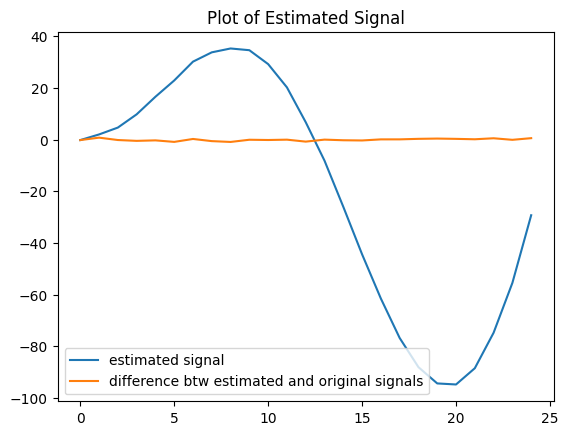

In [20]:
# Compare estimates signal with original signal

plt.plot(signal_est, label = "estimated signal")
comp = signal_est - signal
plt.plot(comp, label = "difference btw estimated and original signals")
plt.title("Plot of Estimated Signal")
plt.legend()

Text(0.5, 1.0, 'Difference btw Estimated and Original Signals')

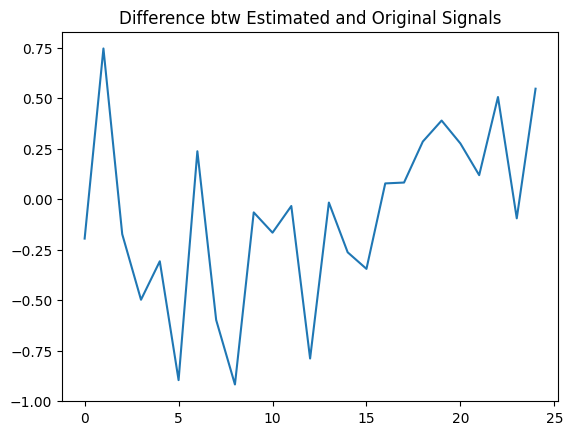

In [21]:
comp = signal_est - signal
plt.plot(comp)
plt.title("Difference btw Estimated and Original Signals")

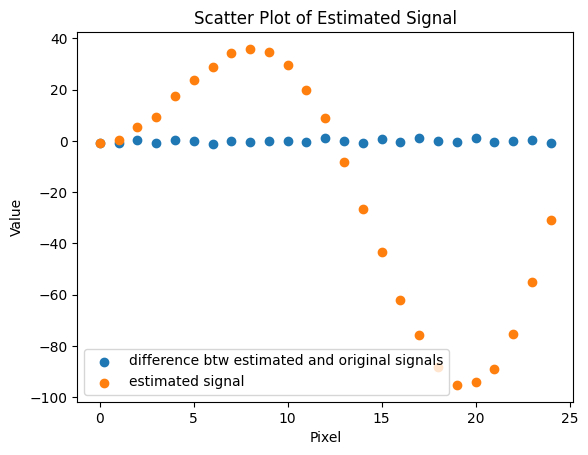

In [18]:
# Scatter Plot

plt.scatter(range(len(comp)), comp, label = "difference btw estimated and original signals")
plt.scatter(range(len(signal_est)), signal_est, label = "estimated signal")
plt.xlabel("Pixel")
plt.ylabel("Value")
plt.title("Scatter Plot of Estimated Signal")
plt.legend()
plt.show()

Add Correlated, Stationary Noise to Data Stream

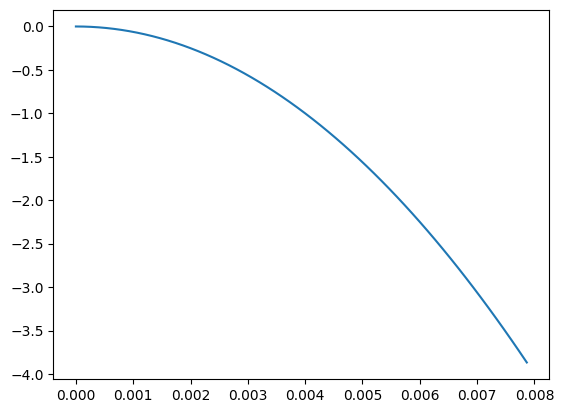

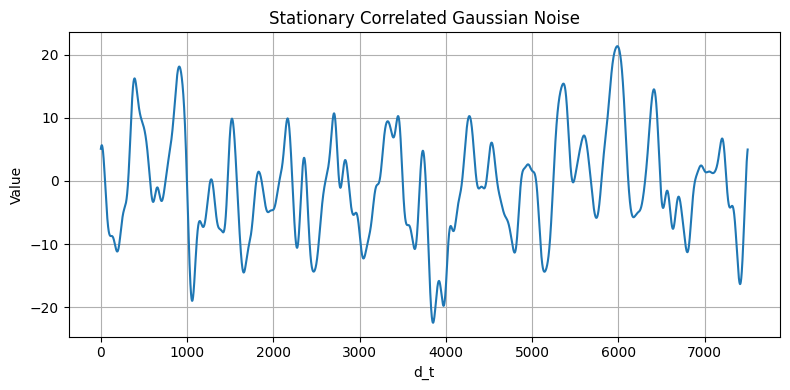

In [19]:
# Generate Noise

def generate_stationary_correlated_noise(N, variance=1.0, correlation_scale=30):

    # Frequency domain: define power spectrum P(f) = variance * exp(- (f/f0)^2)
    freqs = np.fft.fftfreq(N)
    psd = variance * np.exp(-(freqs * N / correlation_scale)**2)
    plt.plot(freqs[:60],np.log(psd[:60]))

    # Random Fourier coefficients
    real = np.random.normal(0, np.sqrt(psd / 2), N)
    imag = np.random.normal(0, np.sqrt(psd / 2), N)
    fft_coeffs = real + 1j * imag
    fft_coeffs[0] = np.random.normal(0, np.sqrt(psd[0]))  # Real DC component

    # Make Hermitian for real signal
    fft_coeffs[N//2+1:] = np.conj(fft_coeffs[1:(N//2)][::-1])

    # Inverse FFT to get real-valued stationary process
    noise = np.fft.ifft(fft_coeffs, norm = "forward").real
    return noise

noise_stationary = generate_stationary_correlated_noise(7500).reshape(-1, 1)

plt.figure(figsize=(8, 4))
plt.plot(noise_stationary)
plt.title("Stationary Correlated Gaussian Noise")
plt.xlabel("d_t")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
print(noise_stationary.shape)

(7500, 1)


In [21]:
print(np.var(noise_stationary))

68.02495876711974


In [22]:
Data_final_2 = np.add(Data, noise_stationary)

In [75]:
print(Data_final_2.shape)

(7500, 1)


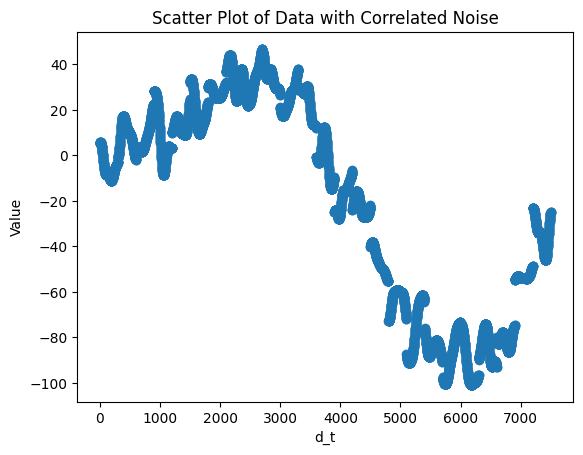

In [23]:
# Scatter Plot

plt.scatter(range(len(Data_final_2.flatten())), Data_final_2.flatten())
plt.xlabel("d_t")
plt.ylabel("Value")
plt.title("Scatter Plot of Data with Correlated Noise")
plt.show()

In [24]:
from scipy.linalg import toeplitz

N = 7500
variance = 1.0
correlation_scale = 30 

# Define power spectral density (PSD) in frequency domain
freqs = np.fft.fftfreq(N)
psd = variance * np.exp(-(freqs * N / correlation_scale)**2)

autocov = np.fft.ifft(np.abs(psd)).real

full_cov_matrix = toeplitz(autocov)
C = full_cov_matrix

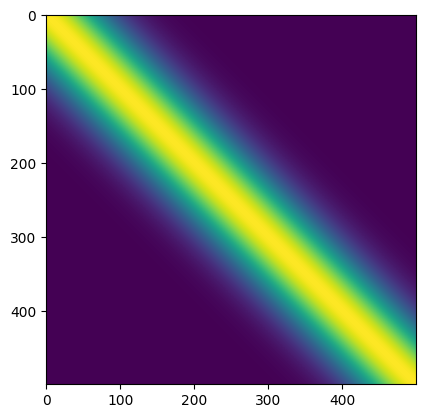

In [25]:
plt.imshow(C[:500,:500])

In [26]:
print(C[10][10])

0.007089815403622065


In [27]:
print(np.diag(C))

[0.00708982 0.00708982 0.00708982 ... 0.00708982 0.00708982 0.00708982]


In [28]:
from numpy.fft import fft, ifft

def apply_N_inv_matrix(D, psd):

    D_fft = np.fft.fft(D, axis=0)
    D_whitened = D_fft / psd[:, np.newaxis]  
    return np.real(np.fft.ifft(D_whitened, axis=0))

In [29]:
psd_safe = psd + 1e-10

In [30]:
P_T_Ninv_P = P.T @ apply_N_inv_matrix(P, psd_safe)
P_T_Ninv_d = P.T @ apply_N_inv_matrix(Data_final_2, psd_safe)
signal_est2 = np.linalg.solve(P_T_Ninv_P, P_T_Ninv_d)

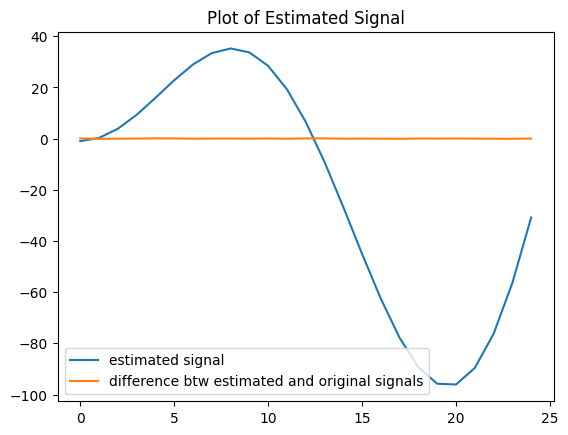

In [31]:
# Compare estimates signal with original signal

plt.plot(signal_est2, label = "estimated signal")
comp2 = signal_est2 - signal
plt.plot(comp, label = "difference btw estimated and original signals")
plt.title("Plot of Estimated Signal")
plt.legend()

Text(0.5, 1.0, 'Difference btw Estimated and Original Signals')

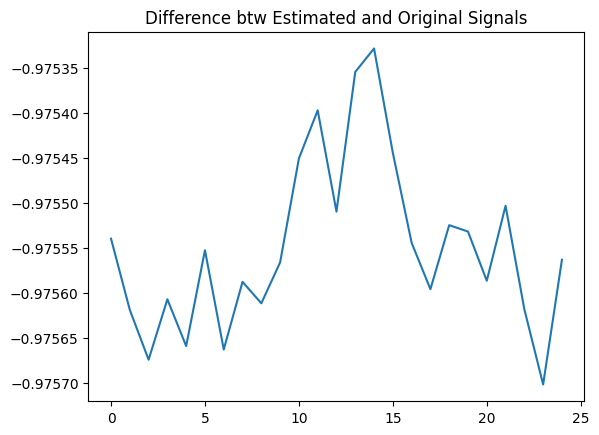

In [32]:
plt.plot(comp2)
plt.title("Difference btw Estimated and Original Signals")

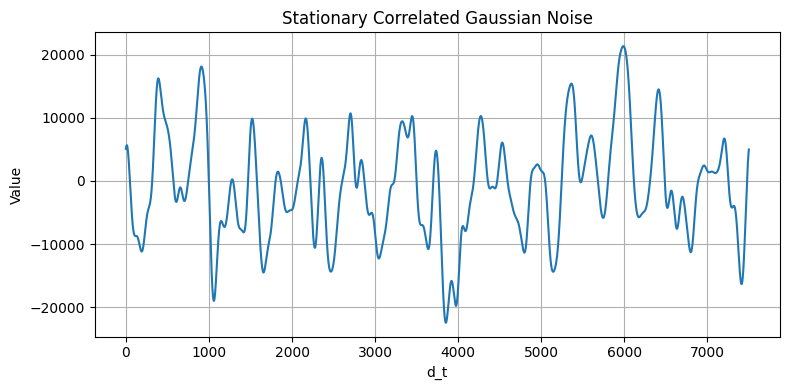

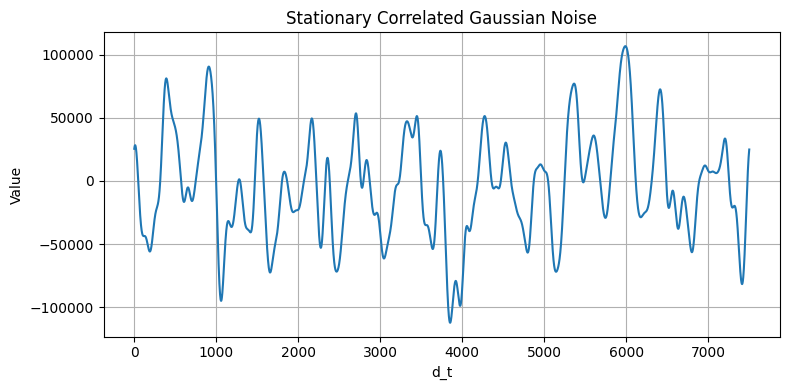

In [33]:
noise_amp_1 = noise_stationary * 1000
noise_amp_2 = noise_stationary * 5000

plt.figure(figsize=(8, 4))
plt.plot(noise_amp_1)
plt.title("Stationary Correlated Gaussian Noise")
plt.xlabel("d_t")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(noise_amp_2)
plt.title("Stationary Correlated Gaussian Noise")
plt.xlabel("d_t")
plt.ylabel("Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
Data_final_3 = np.add(Data, noise_amp_1)
Data_final_4 = np.add(Data, noise_amp_2)

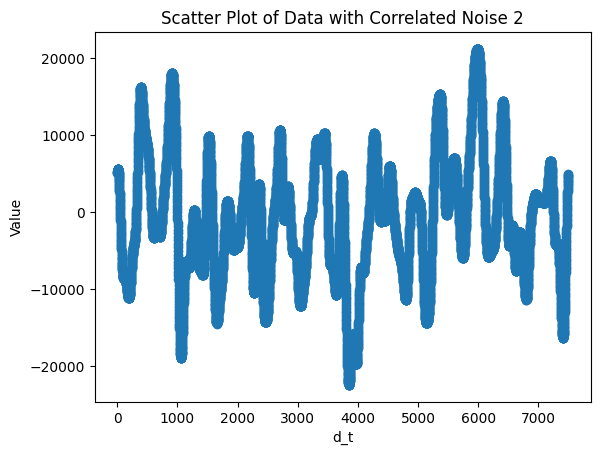

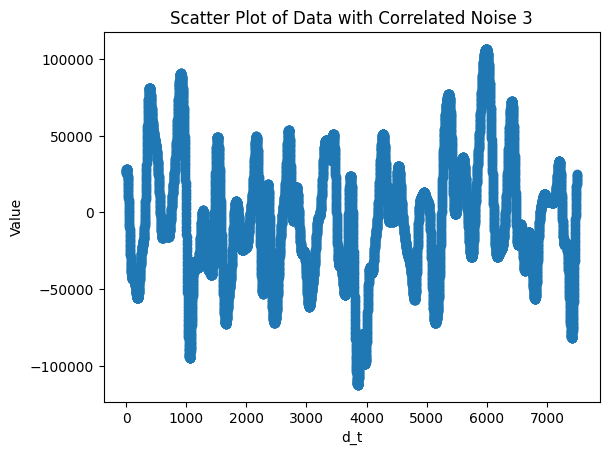

In [35]:
# Scatter Plot

plt.scatter(range(len(Data_final_3.flatten())), Data_final_3.flatten())
plt.xlabel("d_t")
plt.ylabel("Value")
plt.title("Scatter Plot of Data with Correlated Noise 2")
plt.show()

plt.scatter(range(len(Data_final_4.flatten())), Data_final_4.flatten())
plt.xlabel("d_t")
plt.ylabel("Value")
plt.title("Scatter Plot of Data with Correlated Noise 3")
plt.show()

In [36]:
variance_2 = 1.0 * 10e6
correlation_scale_2 = 30 * 10e6
variance_3 = 1.0 * (5e3) ** 2
correlation_scale_3 = 30 * (5e3) ** 2

psd2 = variance_2 * np.exp(-(freqs * N / correlation_scale_2)**2)
psd3 = variance_3 * np.exp(-(freqs * N / correlation_scale_3)**2)

autocov_2 = np.fft.ifft(np.abs(psd2)).real
full_cov_matrix_2 = toeplitz(autocov_2)

autocov_3 = np.fft.ifft(np.abs(psd3)).real
full_cov_matrix = toeplitz(autocov_3)

In [37]:
P_T_Ninv_P = P.T @ apply_N_inv_matrix(P, psd2)
P_T_Ninv_d = P.T @ apply_N_inv_matrix(Data_final_3, psd2)
signal_est3 = np.linalg.solve(P_T_Ninv_P, P_T_Ninv_d)

P_T_Ninv_P = P.T @ apply_N_inv_matrix(P, psd3)
P_T_Ninv_d = P.T @ apply_N_inv_matrix(Data_final_4, psd3)
signal_est4 = np.linalg.solve(P_T_Ninv_P, P_T_Ninv_d)

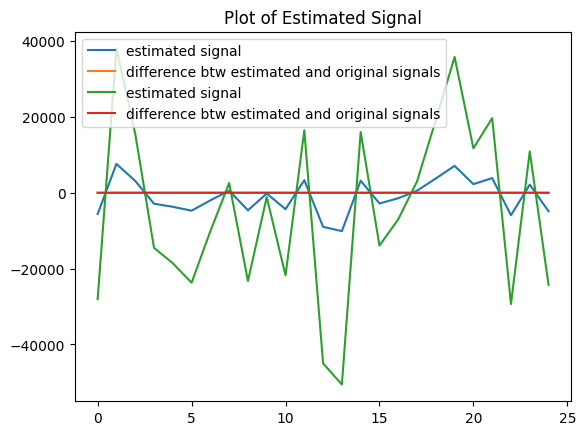

In [38]:
# Compare estimates signal with original signal

plt.plot(signal_est3, label = "estimated signal")
comp2 = signal_est3 - signal
plt.plot(comp, label = "difference btw estimated and original signals")
plt.title("Plot of Estimated Signal")
plt.legend()

plt.plot(signal_est4, label = "estimated signal")
comp2 = signal_est4 - signal
plt.plot(comp, label = "difference btw estimated and original signals")
plt.title("Plot of Estimated Signal")
plt.legend()